# How to Use Camera3D

This is a simple demonstration of how you can use py5 with the Processing library Camera3D. If you are running this notebook through Binder or Thebe (see the rocket ship icon at the top of this page), the running Sketch will be viewable through a py5 Sketch Portal.

## Import Jars

Camera3D is a Processing library, and therefore the library itself is written in Java. The library is stored in a Jar file that must be added to the Java classpath. By default, any Jar files stored in a `jars` subdirectory are automatically added to the Java classpath. In this repo the Jar files are stored in a subdirectory of the root directory, so the `jars` directory must be explicitly added.

In [1]:
import time

import jpype.imports

import py5_tools
py5_tools.add_jars('../jars')

## Import py5

Import the py5 library. When the library is imported the Java Virtual Machine (JVM) is started. Any additions or changes to the Java classpath must be done before importing py5.

In [2]:
import py5

## Import Camera3D

The following line of code will allow us to create an instance of the Camera3D class in the `setup()` method.

In [3]:
from camera3D import Camera3D

There is no actual Python package called camera3D that `from camera3D import Camera3D` is importing from. The reason why the previous cell works is because of some jpype import magic activated with `import jpype.imports` in the first cell. After the next py5 release this will be activated for you, so there will no longer be a need to import `jpype.imports` explicitly.

## Define Global Variables

Define some global variables that will be used by the Sketch.

In [4]:
rot_x = 0
rot_y = 0
rot_z = 0

## Define `setup` Method

The setup method will set the frame rate and other basic setup stuff. It will also create an instance of Camera3D and set some Camera3D options.

In [5]:
def setup():
    py5.size(400, 400, py5.P3D)
    py5.frame_rate(30)
    py5.stroke_weight(8)
    py5.stroke(0)
    py5.no_fill()

    camera3D = Camera3D(py5.get_current_sketch())
    camera3D.setBackgroundColor(py5.color(192))
    camera3D.renderDefaultAnaglyph().setDivergence(1)

## Define `pre_draw` Method

The `pre_draw` method is a Camera3D addition that runs once before any calls to the `draw` method. Camera3D will call the `draw` method multiple times per frame. It is helpful to have the ability to have some code run only once per frame instead of multiple times. In this case, we are adjusting the rotation variables.

In [6]:
def pre_draw():
    global rot_x, rot_y, rot_z
    rot_x += 0.8
    rot_y += 0.3
    rot_z += 0.5

## Define `draw` Method

The draw method will do some transformations and draw a box.

In [7]:
def draw():
    py5.translate(py5.width / 2, py5.height / 2, -200)
    py5.rotate_x(py5.radians(rot_x))
    py5.rotate_y(py5.radians(rot_y))
    py5.rotate_z(py5.radians(rot_z))

    py5.box(250)

## Define `post_draw` Method

Similar to `pre_draw`, the `post_draw` method is run after all calls to the `draw` method. This `post_draw` method doesn't do anything, but we will need it for reasons that will be clear later.

In [8]:
def post_draw():
    pass

## Run the Sketch

Run the sketch, opening a window on the display. If you are runnning this notebook locally, you will see a new window open for the running Sketch.

In [9]:
py5.run_sketch()

Here's a screenshot, so readers of the static documentation website can understand what is happening:

Camera 3D 1.2.3 by Jim Schmitz https://ixora.io


Output(layout=Layout(max_height='200px', overflow='auto'))

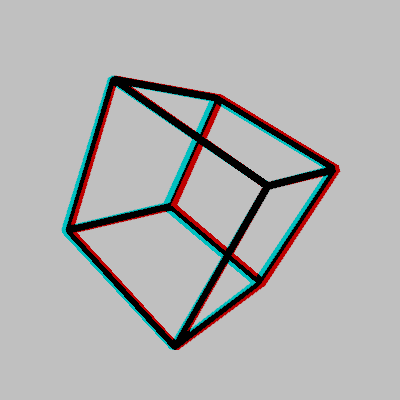

In [10]:
time.sleep(3)

py5_tools.screenshot(hook_post_draw=True)

## Open the py5 Sketch Portal

If you are running this through Binder, or possibly using the documentation website's Live Code feature (see the rocket ship icon at the top of the page), the Sketch is running on a server somewhere in the cloud. In that case, to see the Sketch you will need to create a Sketch Portal using [py5tools.sketch_portal()](/reference/py5tools_sketch_portal). This will create what is effectively a view into what is being displayed on that Sketch window running in the cloud. To be clear, although you will see a live animation in the Sketch Portal, the Sketch is not actually running in your browser. It’s kind of like when you watch a live television program on your TV. The live events are taking place somewhere else, but images of the events are being broadcast to your television.

Since Camera3D works by calling the `draw` method multiple times and creating a composite image, the py5 Sketch Portal needs to run after the composite image has been created. To do that, we will use the dummy `post_draw` method and the `hook_post_draw` parameter.

In [11]:
py5_tools.sketch_portal(hook_post_draw=True)

RuntimeError: The sketch_widget() functionality is broken and was removed in py5 version 0.10.0. It will be re-introduced in a future release. Sorry!

## Next Steps for Jupyter Lab Users

If you are using Jupyter Lab, after executing the previous cell, try right clicking in the output area and selecting `Create New View for Output`. This will create a new panel just for the Sketch Portal. Creating a `New Console for Notebook` and creating a portal there works well also.